<a href="https://colab.research.google.com/github/carlossoto362/QLS2021-2022Diploma/blob/main/BiologyHomwork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Biophysics Homework II (2021-2022)/Programing part
Hire are the python procedures used to made the Biophysics Homework II (2021-2022). 

##Active Brownian particles:
The idea is to use the Euler scheme numerical integration to solve the system 
\begin{equation}
\begin{aligned}
    &\dot{\theta}=\omega + \sqrt{2D_r} \xi_\theta \\
    &\dot{x} = v\cos{\theta} + \sqrt{2D_t} \xi_x\\
    &\dot{y} = v\sin{\theta} + \sqrt{2D_t} \xi_y,
\end{aligned}
\end{equation}

In [2]:
from sympy.printing.latex import print_latex
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from scipy import stats
sy.init_session()
%matplotlib inline

IPython console for SymPy 1.7.1 (Python 3.7.12-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.7.1/



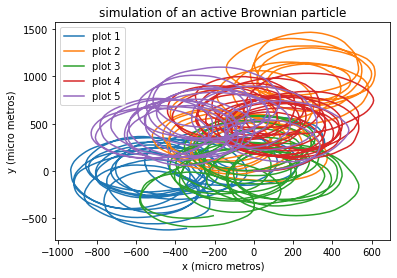

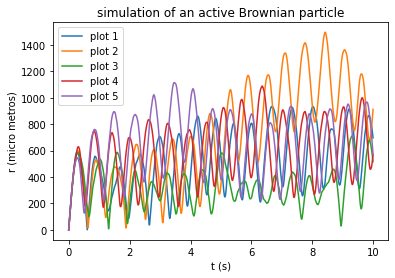

In [ ]:
#defining the initial conditions, and the functions
np.random.seed(2777)

dt = 0.01

n = int(10/dt)

Dt = 0.2
Dr = 0.17
v = 30
w = 10
x = np.zeros((n,5))
y = np.zeros((n,5))
theta = np.zeros((n,5))
t = np.arange(n)*dt
for j in range(5):
  for i in range(n-1):
    theta[i+1,j] = theta[i,j] + w*dt + np.sqrt(2*Dr)*np.random.normal(loc=0,scale=np.sqrt(dt))
    x[i+1,j] = x[i,j] + v*np.cos(theta[i,j]) + np.sqrt(2*Dt)*np.random.normal(loc=0,scale=np.sqrt(dt))
    y[i+1,j] = y[i,j] + v*np.sin(theta[i,j]) + np.sqrt(2*Dt)*np.random.normal(loc=0,scale=np.sqrt(dt))

plt.title("simulation of an active Brownian particle")
plt.xlabel("x (micro metros)")
plt.ylabel("y (micro metros)")
for i in range(5): 
  plt.plot(x[:,i],y[:,i],label="plot "+str(i+1))
plt.legend()
plt.show()
plt.title("simulation of an active Brownian particle")
plt.xlabel("t (s)")
plt.ylabel("r (micro metros)")
for i in range(5):  
  plt.plot(t,np.sqrt(x[:,i]*x[:,i] + y[:,i]*y[:,i]),label="plot "+str(i+1))
plt.legend()
plt.show()


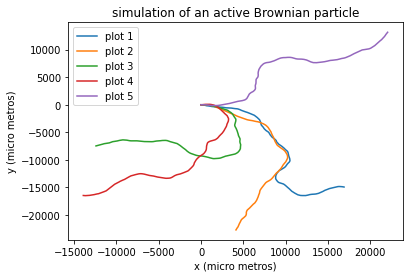

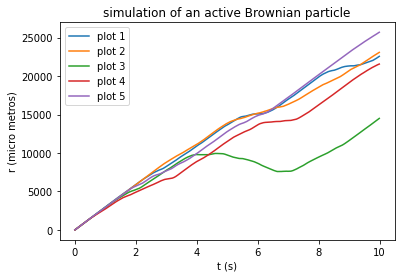

In [ ]:
w = 0
x = np.zeros((n,5))
y = np.zeros((n,5))
theta = np.zeros((n,5))
t = np.arange(n)*dt
for j in range(5):
  for i in range(n-1):
    theta[i+1,j] = theta[i,j] + w*dt + np.sqrt(2*Dr)*np.random.normal(loc=0,scale=np.sqrt(dt))
    x[i+1,j] = x[i,j] + v*np.cos(theta[i,j]) + np.sqrt(2*Dt)*np.random.normal(loc=0,scale=np.sqrt(dt))
    y[i+1,j] = y[i,j] + v*np.sin(theta[i,j]) + np.sqrt(2*Dt)*np.random.normal(loc=0,scale=np.sqrt(dt))

plt.title("simulation of an active Brownian particle")
plt.xlabel("x (micro metros)")
plt.ylabel("y (micro metros)")
for i in range(5):  
  plt.plot(x[:,i],y[:,i],label="plot "+str(i+1))
plt.legend()
plt.show()
plt.title("simulation of an active Brownian particle")
plt.xlabel("t (s)")
plt.ylabel("r (micro metros)")
for i in range(5):  
  plt.plot(t,np.sqrt(x[:,i]*x[:,i] + y[:,i]*y[:,i]),label="plot "+str(i+1))
plt.legend()
plt.show()

In [ ]:
#geting the probability distribution of theta

dt = 0.001
n = int(1/dt)
Dt = 0.2
Dr = 0.17
v = 30
w = 10
thetas = np.zeros(10**3)
for j in range(10**3):
  theta = 0
  for i in range(n-1):
      theta += w*dt + np.sqrt(2*Dr)*np.random.normal(loc=0,scale=np.sqrt(dt))
  thetas[j] = theta
def teoreticalDensity(theta,t):
  return np.exp( -((theta - w*t)**2)/(4*Dr*t)   )/(np.sqrt(4*np.pi*Dr*t))
thetasT = np.zeros(200)
ts = np.arange(200)*(18/200)
for i in range(200):
  thetasT[i] = teoreticalDensity(ts[i],1)


In [ ]:
#defining the Kolmogorov–Smirnov statistic
print(stats.kstest((thetas -w*1)/np.sqrt(2*Dr*1),'norm' ))
print("critical value for alpha = 0.05: ", 1.36/np.sqrt(1000))

KstestResult(statistic=0.017035058967790395, pvalue=0.9337131948525057)
critical value:  0.04300697617828996


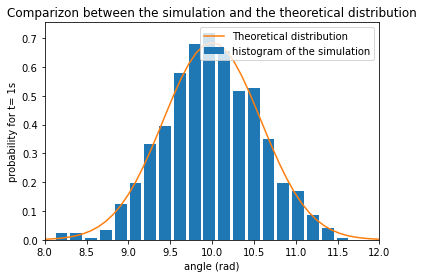

In [ ]:

plt.title("Comparizon between the simulation and the theoretical distribution")
plt.hist(thetas, density = True, rwidth=0.8, bins=20, label="histogram of the simulation")
plt.plot(ts,thetasT,label="Theoretical distribution")
plt.xlabel("angle (rad)")
plt.ylabel("probability for t= 1s")
plt.xlim([8,12])
plt.legend()
plt.show()

In [ ]:
dt = 0.001
n = int(5/dt)
Dt = 0.2
Dr = 0.17
v = 30
w = 10
thetas = np.zeros(10**3)
for j in range(10**3):
  theta = 0
  for i in range(n-1):
      theta += w*dt + np.sqrt(2*Dr)*np.random.normal(loc=0,scale=np.sqrt(dt))
  thetas[j] = theta
thetasT = np.zeros(1000)
ts = np.arange(1000)*(60/1000)
for i in range(1000):
  thetasT[i] = teoreticalDensity(ts[i],5)


In [ ]:
#defining the Kolmogorov–Smirnov statistic
thetasSample=np.random.normal(loc=w*5,scale=np.sqrt(2*Dr*5),size=1000)
print(stats.kstest((thetas -w*5)/np.sqrt(2*Dr*5),'norm' ))
print("critical value for alpha = 0.05: ", 1.36/np.sqrt(1000))

KstestResult(statistic=0.02660903690351657, pvalue=0.47683550095021593)
critical value:  0.04300697617828996


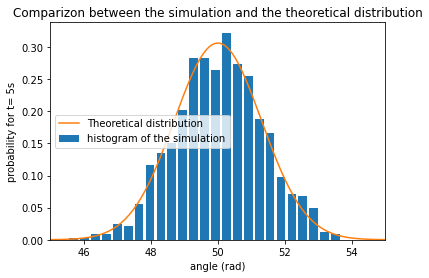

In [ ]:
plt.title("Comparizon between the simulation and the theoretical distribution")
plt.hist(thetas, density = True, rwidth=0.8, bins=25, label="histogram of the simulation")
plt.plot(ts,thetasT,label="Theoretical distribution")
plt.xlabel("angle (rad)")
plt.ylabel("probability for t= 5s")
plt.xlim([45,55])
plt.legend()
plt.show()

In [ ]:
dt = 0.001
n = int(10/dt)
Dt = 0.2
Dr = 0.17
v = 30
w = 10
thetas = np.zeros(10**3)
for j in range(10**3):
  theta = 0
  for i in range(n-1):
      theta += w*dt + np.sqrt(2*Dr)*np.random.normal(loc=0,scale=np.sqrt(dt))
  thetas[j] = theta
thetasT = np.zeros(1000)
ts = np.arange(1000)*(120/1000)
for i in range(1000):
  thetasT[i] = teoreticalDensity(ts[i],10)




In [ ]:
#defining the Kolmogorov–Smirnov statistic
thetasSample=np.random.normal(loc=w*10,scale=np.sqrt(2*Dr*10),size=1000)
print(stats.kstest((thetas -w*10)/np.sqrt(2*Dr*10),'norm' ))
print("critical value for alpha=0.1: ", 1.22/np.sqrt(1000))

KstestResult(statistic=0.015992955366681882, pvalue=0.960153526737808)
critical value for alpha=0.1:  0.03857978745405423


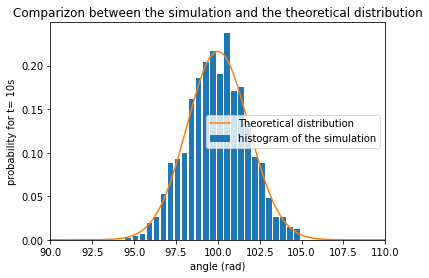

In [ ]:
plt.title("Comparizon between the simulation and the theoretical distribution")
plt.hist(thetas, density = True, rwidth=0.8, bins=25, label="histogram of the simulation")
plt.plot(ts,thetasT,label="Theoretical distribution")
plt.xlabel("angle (rad)")
plt.ylabel("probability for t= 10s")
plt.xlim([90,110])
plt.legend()
plt.show()

#Statistics of enzymatic reactions

In [3]:
#defining the elemets of the master equation
PE,PES,PEP,kmas,kmen,gamma, lamda,t = sy.symbols('PS PES PEP kmas kmen gamma lamda t',real=True)
lambda1,lambda2,lambda3,v1,v2,v3= sy.symbols('lambda1 lambda2 lambda3 v1 v2 v3')

matrix = sy.Matrix([[-gamma, kmen,kmas],[kmas,-gamma,kmen],[kmen,kmas,-gamma]])

In [4]:
#finding the determinant, the eigenvectors and eigenvalues
identidad = sy.eye(3)
det = sy.collect((matrix-lamda*identidad).det(), (lamda**3,lamda**2,lamda))
pprint(det)
P = matrix.diagonalize()

v = []
l = []
for i in range(3):
  l.append(sy.simplify(sy.re(P[1][i,i])) + I*sy.simplify(sy.im(P[1][i,i])))
  v.append(sy.Matrix([sy.simplify(sy.re(P[0][i,0])) + I*sy.simplify(im(P[0][i,0])), sy.simplify(sy.re(P[0][i,1])) + I*sy.simplify(im(P[0][i,1])),sy.simplify(sy.re(P[0][i,2])) + I*sy.simplify(im(P[0][i,2]))]))

v1 = v[2]
v2 = v[1]
v3 = v[0]
lambda1 = l[0]
lambda2 = l[1]
lambda3 = l[2]
pprint(lambda1)
pprint(lambda2)
pprint(lambda3)
pprint(v1)
pprint(v2)
pprint(v3)



   3                        2       3       3    3     ⎛     2              ⎞
- γ  + 3⋅γ⋅kmas⋅kmen - 3⋅γ⋅λ  + kmas  + kmen  - λ  + λ⋅⎝- 3⋅γ  + 3⋅kmas⋅kmen⎠
-γ + kmas + kmen
     kmas   kmen   √3⋅ⅈ⋅(-kmas + kmen)
-γ - ──── - ──── + ───────────────────
      2      2              2         
     kmas   kmen   √3⋅ⅈ⋅(kmas - kmen)
-γ - ──── - ──── + ──────────────────
      2      2             2         
⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦
⎡    1     ⎤
⎢          ⎥
⎢  1   √3⋅ⅈ⎥
⎢- ─ - ────⎥
⎢  2    2  ⎥
⎢          ⎥
⎢  1   √3⋅ⅈ⎥
⎢- ─ + ────⎥
⎣  2    2  ⎦
⎡    1     ⎤
⎢          ⎥
⎢  1   √3⋅ⅈ⎥
⎢- ─ + ────⎥
⎢  2    2  ⎥
⎢          ⎥
⎢  1   √3⋅ⅈ⎥
⎢- ─ - ────⎥
⎣  2    2  ⎦


In [13]:
#finding the exact solution for the equation. 
V = sy.Matrix([v1.T,v2.T,v3.T]).T
solution = sy.Matrix([[sy.simplify(sy.re(sy.exp(lambda1*t))) + I*sy.simplify(sy.im(sy.exp(lambda1*t))),0,0],[0,sy.simplify(sy.re(sy.exp(lambda2*t))) + I*sy.simplify(sy.im(sy.exp(lambda2*t))),0],[0,0,sy.simplify(sy.re(sy.exp(lambda3*t))) + I*sy.simplify(sy.im(sy.exp(lambda3*t)))]])
solution = V*solution*V**-1
sol = []
for i in range(3):
  sol.append([])
  for j in range(3):
    sol[i].append(sy.simplify(sy.re(solution[i,j])) + I*sy.simplify(sy.im(solution[i,j])))
sol = sy.Matrix(sol)

#the solution is sol*P(0), where P(0) is a vector with the initial probabilities. 
sy.pprint(sol[2,2])

#the probability at time 'time'
def finalProbability(kma,kme,time,pi):
  gam = kma + kme
  pfinal = sol*pi
  pfinal = pfinal.subs([(kmas,kma),(kmen,kme),(gamma,gam),(t , time)])
  return sy.simplify(pfinal)
finalProbab = finalProbability(10,1,3,sy.Matrix([1,0,0]))
print([finalProbab[0].evalf(),finalProbab[1].evalf(),finalProbab[2].evalf()])



⎛ 3⋅t⋅(kmas + kmen)                            ⎞     ⎛    kmas   kmen⎞
⎜ ─────────────────                            ⎟  -t⋅⎜γ + ──── + ────⎟
⎜         2                ⎛√3⋅t⋅(kmas - kmen)⎞⎟     ⎝     2      2  ⎠
⎜ℯ                  + 2⋅cos⎜──────────────────⎟⎟⋅ℯ                    
⎝                          ⎝        2         ⎠⎠                      
──────────────────────────────────────────────────────────────────────
                                  3                                   
[0.333333333333333, 0.333333333333333, 0.333333333333333]


In [17]:
#solving the systema numerically:
n = 90000
p1 = 1
p2 = 0
p3 = 0
kma = 10
kme = 1
dt = 3/n
for _ in range(n):
  p1 = p1 +  kma*p3*dt + kme*p2*dt - (kma + kme)*p1*dt
  p2 = p2 +  kma*p1*dt + kme*p3*dt - (kma + kme)*p2*dt
  p3 = p3 +  kma*p2*dt + kme*p1*dt - (kma + kme)*p3*dt 
print(p1,p2,p3)

0.33328887851607025 0.33328887851607025 0.3332888785160496


Here we plot the time dependant transition rates of the dynamics of a photoreceptor.

In [ ]:
def w21(mu,omega,t):
  value=mu*np.cos(omega*t)
  return value

def w12(mu,omega,t):
  value=mu*np.sin(omega*t)
  return value


AttributeError: ignored

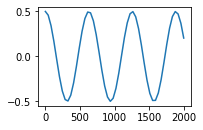

In [ ]:
t=np.linspace(0,2000)
y1=w21(0.5,1/100,t)
y2=w12(0.5,1/100,t)

y3=w21(0.5,1/50,t)
y4=w12(0.5,1/50,t)



plt.figure(1)
plt.subplot(221)
a1=plt.plot(t, y1)
plt.subplot(222)
a2=plt.plot(t, y2)
plt.subplot(223)
a3=plt.plot(t, y3)
plt.subplot(224)
a4=plt.plot(t, y4)
plt.show()

Gillespie algorith (in progress)

In [ ]:

E = [1500]
ES=[0]
EP=[0]
t = [0]

tend = 3000

kplus = 10
kminus = 1

while t[-1] < tend:

        current_E = E[-1]
        current_ES = ES[-1]
        current_EP = EP[-1]
        

        rates = [kplus, kminus]
        rate_sum = sum(rates)

        tau = np.random.exponential(scale=1/rate_sum)

        t.append(t[-1] + tau)

        rxn=random.randrange(0,3)
        if rxn ==0:
          rand = random.uniform(0,1)

          # production event
          if rand * rate_sum > 0 and rand * rate_sum <= rates[0]:
                  E.append(E[-1] - 1)
                  ES.append(ES[-1]+1)

          # decay event
          elif rand * rate_sum > rates[0] and rand * rate_sum <= rates[0] + rates[1]:
                  E.append(E[-1] - 1)
                  EP.append(EP[-1]+1)

          ES.append(ES[-1])
          EP.append(EP[-1])

        if rxn ==1:
          rand = random.uniform(0,1)

          # production event
          if rand * rate_sum > 0 and rand * rate_sum <= rates[0]:
                  ES.append(ES[-1] - 1)
                  EP.append(EP[-1]+1)

          # decay event
          elif rand * rate_sum > rates[0] and rand * rate_sum <= rates[0] + rates[1]:
                  ES.append(ES[-1] - 1)
                  E.append(E[-1]+1)

          E.append(E[-1])
          EP.append(EP[-1])


        if rxn ==2:
          rand = random.uniform(0,1)

          # production event
          if rand * rate_sum > 0 and rand * rate_sum <= rates[0]:
                  EP.append(EP[-1] - 1)
                  E.append(E[-1]+1)

          # decay event
          elif rand * rate_sum > rates[0] and rand * rate_sum <= rates[0] + rates[1]:
                  EP.append(EP[-1] - 1)
                  ES.append(ES[-1]+1)

          ES.append(ES[-1])
          E.append(E[-1])


plt.plot(t,EP)

plt.show()

In [ ]:
M=sy.Matrix([[1,2],[3,1]])

In [ ]:
M.rref()

⎛⎡1  0⎤        ⎞
⎜⎢    ⎥, (0, 1)⎟
⎝⎣0  1⎦        ⎠

In [ ]:
x=sy.Matrix([2,3])
x

⎡2⎤
⎢ ⎥
⎣3⎦

In [ ]:
M@x

⎡8⎤
⎢ ⎥
⎣9⎦

In [ ]:
A=sy.Matrix([[1,2,3],[4,sy.Rational(5/8),6],[7,8,9]])
A

⎡1   2   3⎤
⎢         ⎥
⎢4  5/8  6⎥
⎢         ⎥
⎣7   8   9⎦

In [ ]:
A.rref()

⎛⎡1  0  0⎤           ⎞
⎜⎢       ⎥           ⎟
⎜⎢0  1  0⎥, (0, 1, 2)⎟
⎜⎢       ⎥           ⎟
⎝⎣0  0  1⎦           ⎠

In [ ]:
b=sy.Matrix([3,2,1])
b

⎡3⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣1⎦

In [ ]:
y=A.LUsolve(b)
y

⎡-2 ⎤
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎣5/3⎦

In [ ]:
exp(2)

In [ ]:
E,gamma, beta, r = symbols('E gamma beta r')
A=sy.Matrix([[-r-(gamma*exp(-beta*E)),gamma,r,0],[gamma*exp(-beta*E),-(gamma+r),0,r],[r,0,-(r+gamma),gamma*exp(-beta*E)],[0,r,gamma,-(gamma*exp(-beta*E)+r)]])
b=sy.Matrix([0,0,0,0])
x=A.LUsolve(b)
A@x

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [ ]:
A.eigenvects()

KeyboardInterrupt: ignored

In [ ]:
A.row(0)+A.row(1)+A.row(3)

⎡                  -E⋅β⎤
⎣-r  0  γ + r  -γ⋅ℯ    ⎦